- See the bellow link, how to build a machine learning algorithm for beginners: 
https://www.tensorflow.org/tutorials/quickstart/beginner

- See the bellow link, how to build a machine learning algorithm for experts: 
https://www.tensorflow.org/tutorials/quickstart/advanced

git source file:
https://github.com/mrdbourke/tensorflow-deep-learning


# **Food Vision with CNN-Binary clssification**

# **1- Import data**

In [ ]:
# Get the file from github (Food 101)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
import zipfile
with zipfile.ZipFile("pizza_steak.zip","r") as zip_ref:
    zip_ref.extractall()
    zip_ref.close()

--2023-06-11 01:41:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.2MB/s    in 3.2s    

2023-06-11 01:41:39 (32.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# **2- Inspect the data**

In [ ]:
# Walk through the pizza-Steak directory and list number of file
import os
for (dirpath, dirnames, filenames) in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")
  print ("-------------------------------------------------------------------")

There are 2 directories and 0 images in pizza_steak.
-------------------------------------------------------------------
There are 2 directories and 0 images in pizza_steak/test.
-------------------------------------------------------------------
There are 0 directories and 250 images in pizza_steak/test/steak.
-------------------------------------------------------------------
There are 0 directories and 250 images in pizza_steak/test/pizza.
-------------------------------------------------------------------
There are 2 directories and 0 images in pizza_steak/train.
-------------------------------------------------------------------
There are 0 directories and 750 images in pizza_steak/train/steak.
-------------------------------------------------------------------
There are 0 directories and 750 images in pizza_steak/train/pizza.
-------------------------------------------------------------------


In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/pizza_steak/train")
class_names = sorted([item.name for item in data_dir.glob("*")])
print(class_names)

['pizza', 'steak']


Random image is: 82578.jpg
Image shape is: (384, 512, 3)


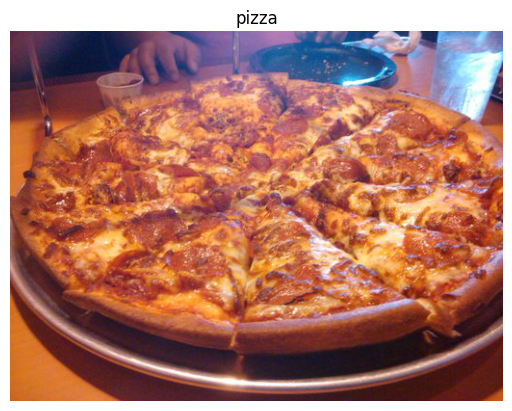

In [ ]:
# Let's visualize our images
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  """
  view random image from target directory and selected class_name.
  """
  
  # Setup target directory (we will view image from here)
  target_folder = target_dir + target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f"Random image is: {random_image[0]}")
  
  # Read the image and plot it
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape is: {image.shape}")
  return image

image = view_random_image(target_dir="pizza_steak/train/",
                  target_class="pizza")

# **3- Preprocess data**

In [ ]:
# Define directory dataset paths
train_dir = "/content/pizza_steak/train"
test_dir  = "/content/pizza_steak/test"

# Create train and test data generator and rescale them
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224), # target size of images
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir, # target directory
                                               target_size=(224, 224), # target size of images
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32)

# Create ImageGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True,
                                             shear_range=0.2,
                                             zoom_range=0.2)

# import data augmented from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


# **4- Create a CNN model**

In [ ]:
# import important libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import Sequential

# Create a CNN model
model = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data_augmented,
                      epochs=10,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 30s 566ms/step - loss: 0.6900 - accuracy: 0.5520 - val_loss: 0.5320 - val_accuracy: 0.7980
Epoch 2/20
47/47 [==============================] - 25s 528ms/step - loss: 0.5806 - accuracy: 0.7113 - val_loss: 0.4642 - val_accuracy: 0.7980
Epoch 3/20
47/47 [==============================] - 25s 524ms/step - loss: 0.5589 - accuracy: 0.7220 - val_loss: 0.4129 - val_accuracy: 0.8240
Epoch 4/20
47/47 [==============================] - 25s 528ms/step - loss: 0.5235 - accuracy: 0.7547 - val_loss: 0.3909 - val_accuracy: 0.8260
Epoch 5/20
47/47 [==============================] - 25s 523ms/step - loss: 0.5069 - accuracy: 0.7653 - val_loss: 0.3961 - val_accuracy: 0.8380
Epoch 6/20
47/47 [==============================] - 24s 509ms/step - loss: 0.4834 - accuracy: 0.7673 - val_loss: 0.3940 - val_accuracy: 0.8280
Epoch 7/20
47/47 [==============================] - 26s 553ms/step - loss: 0.4872 - accuracy: 0.7713 - val_loss: 0.3786 - val_accuracy: 0.8320

# **5- Evaluate the model**

In [ ]:
model.evaluate(test_data)

16/16 [==============================] - 2s 150ms/step - loss: 0.3367 - accuracy: 0.8700


[0.3366754949092865, 0.8700000047683716]

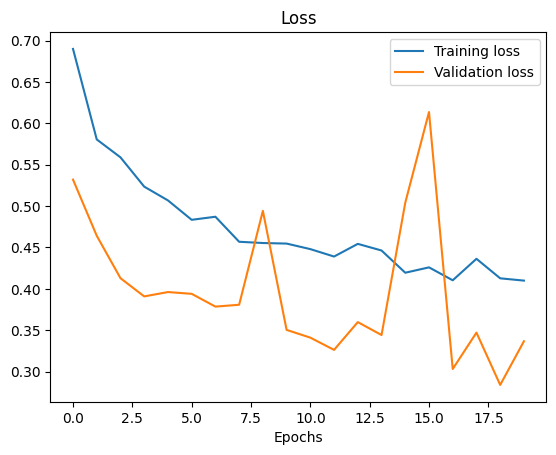

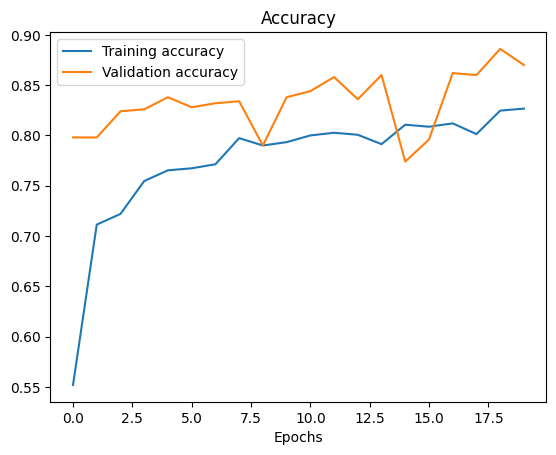

In [ ]:
# Plot loss curver function
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["accuracy"]))

  # Plot loss curves
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, val_accuracy, label="Validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

plot_loss_curves(history)

# **6- Make a prediction with our trained model**

## **6-1- Download the file**

In [ ]:
# View the image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2023-06-11 02:02:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2023-06-11 02:02:02 (62.9 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



## **6-2- preprocess the image file**

In [ ]:
# Create a funvtion to import and resize the image
import tensorflow as tf

def load_and_prep_image(filename, img_size=224):
  """
  read an image from filename, turn into tensor, and reshape it (img_shape, img_shape, colour_channels).
  """
  # read the image 
  img = tf.io.read_file(filename)
  # Decode the image
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, [img_size, img_size])
  # Rescale the image between 0 & 1
  img = img/255.
  return img

steak = load_and_prep_image('03-steak.jpeg')
steak.shape

TensorShape([224, 224, 3])

## **6-3- Predict the model**

1/1 [==============================] - 0s 102ms/step


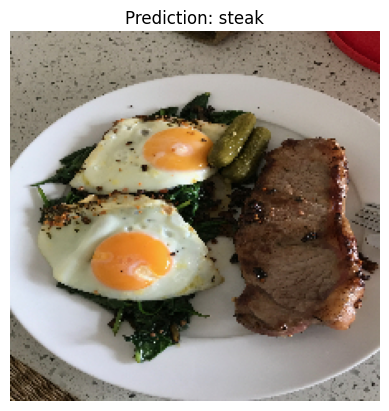

In [ ]:
# Creat function for prediction and plot
def pred_and_plot(model, filename, class_names=class_names):
  
  """
  Import an image located at filename, make a prediction with model
  and plots the image with the predicted class as the title.
  """

  # Load image
  image = load_and_prep_image(filename)
  # predict image
  pred = model.predict(tf.expand_dims(image, axis=0))
  # Get the class name
  pred_class = class_names[int(tf.round(pred))]
  # Plot the image
  plt.imshow(image)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

pred_and_plot(model, filename='03-steak.jpeg', class_names=class_names)

# **7- Save the model**

In [ ]:
# Save the model
model.save("saved_trained_model")